In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [77]:
data = pd.read_csv("./../Data/Final Data/all_combined.csv")
# .set_index(["teamName", "year"]).sort_index()

In [148]:
data_0 = data[data['label'] == 0]
data_1 = data[data['label'] == 1]

# print(data_0)
# print(data_1)

training_data_0 = data_0.sample(frac=0.8)
testing_data_0 = data_0.drop(training_data_0.index)

training_data_1 = data_1.sample(frac=0.8)
testing_data_1 = data_1.drop(training_data_1.index)

# print("data class 0")
# print(training_data_0)
# print(testing_data_0)

# print("data class 1")
# print(training_data_1)
# print(testing_data_1)

X = training_data_0.append(training_data_1, ignore_index=True)
# X_train = X.loc[:, X.columns != 'label']
# X_train = X.loc[:, ~X.columns.isin(['teamName', 'year', 'label', 'seed_points', 'NIT', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'CHMP'])]
X_train = X.loc[:, ~X.columns.isin(['teamName', 'year', 'label', 'seed_points', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'CHMP'])]
X_label = X['label']

# print("training")
# print(X)

Y = testing_data_0.append(testing_data_1, ignore_index=True)
# Y_test = Y.loc[:, Y.columns != 'label']
# Y_test = Y.loc[:, ~Y.columns.isin(['teamName', 'year', 'label', 'seed_points', 'NIT', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'CHMP'])]
Y_test = Y.loc[:, ~Y.columns.isin(['teamName', 'year', 'label', 'seed_points', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'CHMP'])]
Y_label = Y['label']

# print("testing")
# print(Y)

print(X_train.shape)
print(Y_test.shape)

(2514, 13)
(628, 13)


In [149]:
print(X[X['label'] == 0].loc[:, 'teamName'])

0           Campbell
1        Stony Brook
2          Manhattan
3             DePaul
4             Towson
            ...     
2020             LSU
2021    South Dakota
2022          Wagner
2023      Coppin St.
2024        American
Name: teamName, Length: 2025, dtype: object


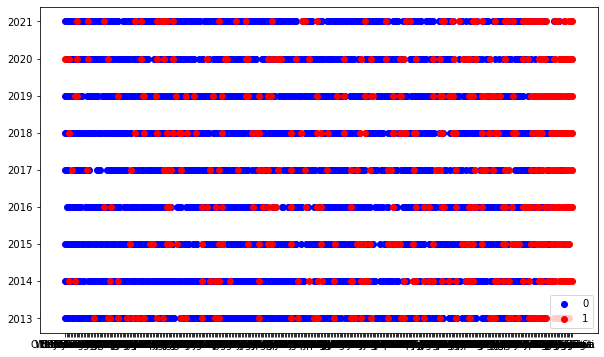

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X[X['label'] == 0].loc[:, 'teamName'], X[X['label'] == 0].loc[:, 'year'], color='b', label='0')
plt.scatter(X[X['label'] == 1].loc[:, 'teamName'], X[X['label'] == 1].loc[:, 'year'], color='r', label='1')
plt.legend();

In [150]:
class LogisticRegression:
    
    # set parameters - learning rate, number ot iterations, bias, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.05, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __bias(self, X):
        # set bias as 1
        bias = np.ones((X.shape[0], 1))
        # concat bias to data
        return np.concatenate((bias, X), axis=1)
    
    def __sigmoid_function(self, x):
        # sigmoid function to predicts yp
        return 1 / (1 + np.exp(-x))
    
    def __loss(self, yp, y):
        # minimize loss
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # training function
    def fit(self, X, y):
        
        # use bias if specified
        if self.fit_intercept:
            X = self.__bias(X)
        
        # initialize weights as 0 initially
        # self.W = np.zeros(X.shape[1])
        self.W = 2 * np.random.randn(X.shape[1])  # Randomly generate initial weight matrix with normal distribution (mu=0, sigma = 2)
        
        # run for number of iterations provided
        for i in range(self.num_iterations):
            
            z = np.dot(X, self.W)
            
            # prediction probabilities
            yp = self.__sigmoid_function(z)
            
            # calculate gradient
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # update W
            self.W -= self.learning_rate * gradient
            
            # new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # calculate loss
            if len(yp) == 0 or len(y) == 0:
                print("Here")
            loss = self.__loss(yp, y)
            
            # to print loss with verbose
            if(self.verbose ==True and i % 1000 == 0):
                print(f'loss: {loss} \t')
    
    # predict the probabilities using W
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__bias(X)
        
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # predict class from probabilities; less than 0.5 = 0 or more than 0.5 = 1
    def predict(self, X):
        np.set_printoptions(suppress=True, precision=2)
        print(self.predict_prob(X))
        return self.predict_prob(X).round()
    
    def set_learning_rate(self, lr):
        self.learning_rate = lr
        
    def set_num_iterations(self, itrs):
        self.num_iterations = itrs

In [151]:
model = LogisticRegression(learning_rate=0.05, num_iterations=10000, verbose=True)

In [152]:
%%time
'''model.set_learning_rate(0.1)
model.set_num_iterations(10000)'''
model.fit(X_train, X_label)

loss: 4.025190187195965 	
loss: 0.04492329180984988 	
loss: 0.024313154625236463 	
loss: 0.01822116366114381 	
loss: 0.014893847503077928 	
loss: 0.012682125922193626 	
loss: 0.011072106202460094 	
loss: 0.009836640289075212 	
loss: 0.008854513023124247 	
loss: 0.008053322507327347 	
Wall time: 9.46 s


In [153]:
preds = model.predict(Y_test)
(preds == Y_label).mean()

[0.   0.01 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.   0.   0.   0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.
 0.01 0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.01
 0.   0.01 0.   0.01 0.01 0.   0.   0.   0.   0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.   0.
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.02
 0.   0.   0.   0.   0.01 0.   0.   0.   0.01 0.01 0.01 0.   0.   0.
 0.01 0.01 0.01 0.   0.01 0.02 0.   0.   0.   0.   0.   0.02 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.
 0.   0.   0.01 0.   0.02 0.   0.   0.02 0.   0.   0.   0.   0.   0.
 0.   0.   0.01 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.

1.0

In [138]:
# Print confusion matrix
tn, fp, fn, tp = confusion_matrix(pd.Series(Y_label), preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  484 
False positives:  22 
False negatives:  41 
True Positives:  81


In [139]:
print("----------WEIGHTS----------")
print("Bias: \t\t\t" + str(model.W[0]))
for i in range(len(X_train.columns)):
    if X_train.columns[i] == "sos" or X_train.columns[i] == "stars":
        print(X_train.columns[i] + ": \t\t\t" + str(model.W[i+1]))
    elif X_train.columns[i] == "adjTempo" or X_train.columns[i] == "win ratio" or X_train.columns[i] == "seed_points":
        print(X_train.columns[i] + ": \t\t" + str(model.W[i+1]))
    else:
        print(X_train.columns[i] + ": \t" + str(model.W[i+1]))
# print(model.W.shape)

----------WEIGHTS----------
Bias: 			-3.761980769980918
prev_3s_recruits: 	-0.1037174314717151
prev_4s_recruits: 	-0.15025203753057162
prev_5s_recruits: 	0.14442664614864031
curr_3s_recruits: 	-0.19728075061814893
curr_4s_recruits: 	0.013674968255753232
curr_5s_recruits: 	-0.08910945146545099
returningMins%: 	-0.9869156612735804
sos: 			-0.6203746569149337
adjTempo: 		0.15151214311090633
win ratio: 		3.5931572466584023
overall efficiency: 	2.5488176878096676
stars: 			-0.046498990756044814


In [132]:
from sklearn.linear_model import LogisticRegression as LogReg
clf = LogReg(max_iter = 10000).fit(X_train, X_label)
clf.predict(Y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [133]:
clf.score(Y_test, Y_label)

0.8980891719745223

### SMOTE Oversampling Algorithm for data augmentation to get equally sized classes

See the following link: <a>https://towardsdatascience.com/smote-fdce2f605729</a>. Here you will find a description for the SMOTE (Synthetic Minority Oversampling Technique) algorithm, which is useful for oversampling data augmentation. We perform that here using the imbalanced learn python library in order to increase the number of data points labeled as having made the NCAA tournament.

In [88]:
from imblearn.over_sampling import SMOTE

# Oversample teams who made tournament for training data
X_train_resampled, X_label_resampled = SMOTE().fit_resample(X_train, X_label)
print("Old X:\tOverall Length = " + str(len(X_train)) + "\tNumber of 0 labels = " + 
      str(pd.Series(X_label).value_counts()[0]) + "\tNumber of 1 labels = " + str(pd.Series(X_label).value_counts()[1]))
print("New X:\tOverall Length = " + str(len(X_train_resampled)) + "\tNumber of 0 labels = " + 
      str(pd.Series(X_label_resampled).value_counts()[0]) + "\tNumber of 1 labels = " + 
      str(pd.Series(X_label_resampled).value_counts()[1]))

# Oversample teams who made tournament for testing data
Y_test_resampled, Y_label_resampled = SMOTE().fit_resample(Y_test, Y_label)
print("\nOld Y:\tOverall Length = " + str(len(Y_test)) + "\tNumber of 0 labels = " + 
      str(pd.Series(Y_label).value_counts()[0]) + "\tNumber of 1 labels = " + str(pd.Series(Y_label).value_counts()[1]))
print("New Y:\tOverall Length = " + str(len(Y_test_resampled)) + "\tNumber of 0 labels = " + 
      str(pd.Series(Y_label_resampled).value_counts()[0]) + "\tNumber of 1 labels = " + 
      str(pd.Series(Y_label_resampled).value_counts()[1]))

Old X:	Overall Length = 2514	Number of 0 labels = 2025	Number of 1 labels = 489
New X:	Overall Length = 4050	Number of 0 labels = 2025	Number of 1 labels = 2025

Old Y:	Overall Length = 628	Number of 0 labels = 506	Number of 1 labels = 122
New Y:	Overall Length = 1012	Number of 0 labels = 506	Number of 1 labels = 506


##### Now we retrain and retest model

In [93]:
%%time
model = LogisticRegression(learning_rate=0.15, num_iterations=10000, verbose=True)
model.fit(X_train_resampled, X_label_resampled)

loss: 0.6648545286113374 	
loss: 0.32791613832941857 	
loss: 0.32142962419918325 	
loss: 0.31637385746947083 	
loss: 0.31225890600420425 	
loss: 0.3088493940111006 	
loss: 0.3059843453748049 	
loss: 0.30354796537093437 	
loss: 0.30145432386792814 	
loss: 0.2996381575076913 	
Wall time: 10.8 s


In [94]:
new_preds = model.predict(Y_test_resampled)
(new_preds == Y_label_resampled).mean()

0.8685770750988142

In [95]:
# Print confusion matrix
print(str(type(Y_test_resampled)) + " " + str(type(new_preds)))
tn, fp, fn, tp = confusion_matrix(pd.Series(Y_label_resampled), new_preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
True negatives:  438 
False positives:  68 
False negatives:  65 
True Positives:  441


In [96]:
print("----------WEIGHTS----------")
print("Bias: \t\t\t" + str(model.W[0]))
for i in range(len(X_train_resampled.columns)):
    if X_train_resampled.columns[i] == "sos" or X_train_resampled.columns[i] == "stars":
        print(X_train_resampled.columns[i] + ": \t\t\t" + str(model.W[i+1]))
    elif X_train_resampled.columns[i] == "adjTempo" or X_train_resampled.columns[i] == "win ratio" or X_train_resampled.columns[i] == "seed_points":
        print(X_train_resampled.columns[i] + ": \t\t" + str(model.W[i+1]))
    else:
        print(X_train_resampled.columns[i] + ": \t" + str(model.W[i+1]))

----------WEIGHTS----------
Bias: 			-4.074377094985026
prev_3s_recruits: 	-0.20952424773389425
prev_4s_recruits: 	-0.17374282443344058
prev_5s_recruits: 	0.10109283757679391
curr_3s_recruits: 	-0.27592231715700866
curr_4s_recruits: 	-0.14831835232325427
curr_5s_recruits: 	-0.41338189612471915
returningMins%: 	-0.6237416787248499
sos: 			-0.43956044318387927
adjTempo: 		0.05680168232057999
win ratio: 		6.556706676766965
overall efficiency: 	2.2728826716710544
stars: 			0.02823528499667161


In [97]:
clf_new = LogReg(max_iter = 10000).fit(X_train_resampled, X_label_resampled)
clf_new.predict(Y_test_resampled)
clf.score(Y_test_resampled, Y_label_resampled)

0.8527667984189723